In [1]:
#%%

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#%%

# Load the datasets
miles_driven = pd.read_csv("miles-driven.csv",sep='|')
road_accidents = pd.read_csv("road-accidents.csv",sep='|')

# Display the first few rows of each dataset
print("Miles Driven Data:")
print(miles_driven.head())

print("\nRoad Accidents Data:")
print(road_accidents.head())

Miles Driven Data:
        state  million_miles_annually
0     Alabama                   64914
1      Alaska                    4593
2     Arizona                   59575
3    Arkansas                   32953
4  California                  320784

Road Accidents Data:
        state  drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
0     Alabama                  18.8               39                 30   
1      Alaska                  18.1               41                 25   
2     Arizona                  18.6               35                 28   
3    Arkansas                  22.4               18                 26   
4  California                  12.0               35                 28   

   perc_fatl_1st_time  
0                  80  
1                  94  
2                  96  
3                  95  
4                  89  


In [3]:
#%%

# Merge the datasets on the 'state' column
data = pd.merge(miles_driven, road_accidents, on="state")

# Display the merged dataset
print("Merged Data:")
print(data.head())

Merged Data:
        state  million_miles_annually  drvr_fatl_col_bmiles  perc_fatl_speed  \
0     Alabama                   64914                  18.8               39   
1      Alaska                    4593                  18.1               41   
2     Arizona                   59575                  18.6               35   
3    Arkansas                   32953                  22.4               18   
4  California                  320784                  12.0               35   

   perc_fatl_alcohol  perc_fatl_1st_time  
0                 30                  80  
1                 25                  94  
2                 28                  96  
3                 26                  95  
4                 28                  89  


Missing Values:
state                     0
million_miles_annually    0
drvr_fatl_col_bmiles      0
perc_fatl_speed           0
perc_fatl_alcohol         0
perc_fatl_1st_time        0
dtype: int64

Summary Statistics:
       million_miles_annually  drvr_fatl_col_bmiles  perc_fatl_speed  \
count               51.000000             51.000000        51.000000   
mean             57851.019608             15.790196        31.725490   
std              59898.414088              4.122002         9.633438   
min               3568.000000              5.900000        13.000000   
25%              17450.000000             12.750000        23.000000   
50%              46606.000000             15.600000        34.000000   
75%              71922.500000             18.500000        38.000000   
max             320784.000000             23.900000        54.000000   

       perc_fatl_alcohol  perc_fatl_1st_time  
count          51.000000            51.00000  
mean           30.686275            88.

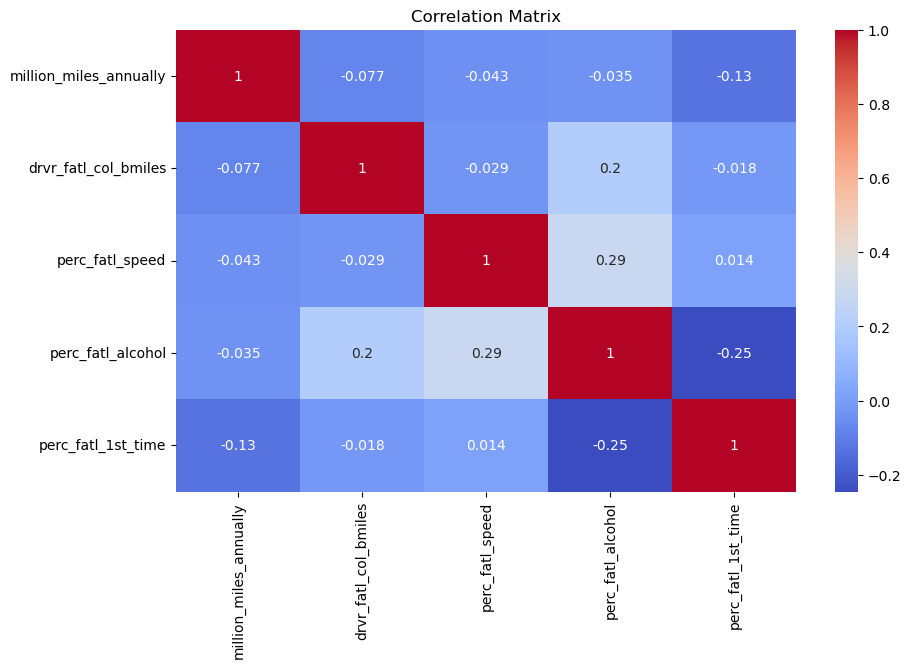

In [4]:
#%%

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [5]:
#%%

# Select relevant features for clustering

features = data[["million_miles_annually", "drvr_fatl_col_bmiles", "perc_fatl_speed", "perc_fatl_1st_time"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("Scaled Features:")
print(scaled_df.head())

Scaled Features:
   million_miles_annually  drvr_fatl_col_bmiles  perc_fatl_speed  \
0                0.119089              0.737446         0.762645   
1               -0.897986              0.565936         0.972321   
2                0.029068              0.688443         0.343293   
3               -0.419807              1.619498        -1.438953   
4                4.433328             -0.928653         0.343293   

   perc_fatl_1st_time  
0           -1.266117  
1            0.765361  
2            1.055572  
3            0.910466  
4            0.039833  


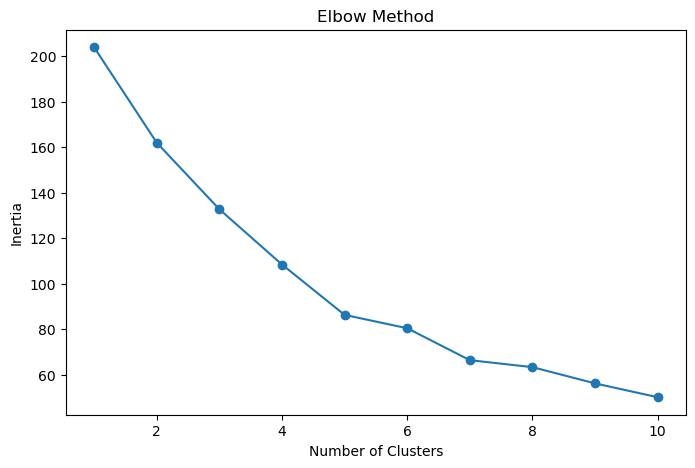

In [6]:
#%%

# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [7]:
#%%

# Choose the optimal number of clusters (5 based on the Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42)
data["cluster"] = kmeans.fit_predict(scaled_df)

# Display the clusters
print("Data with Clusters:")
print(data.head())

Data with Clusters:
        state  million_miles_annually  drvr_fatl_col_bmiles  perc_fatl_speed  \
0     Alabama                   64914                  18.8               39   
1      Alaska                    4593                  18.1               41   
2     Arizona                   59575                  18.6               35   
3    Arkansas                   32953                  22.4               18   
4  California                  320784                  12.0               35   

   perc_fatl_alcohol  perc_fatl_1st_time  cluster  
0                 30                  80        0  
1                 25                  94        4  
2                 28                  96        4  
3                 26                  95        3  
4                 28                  89        2  


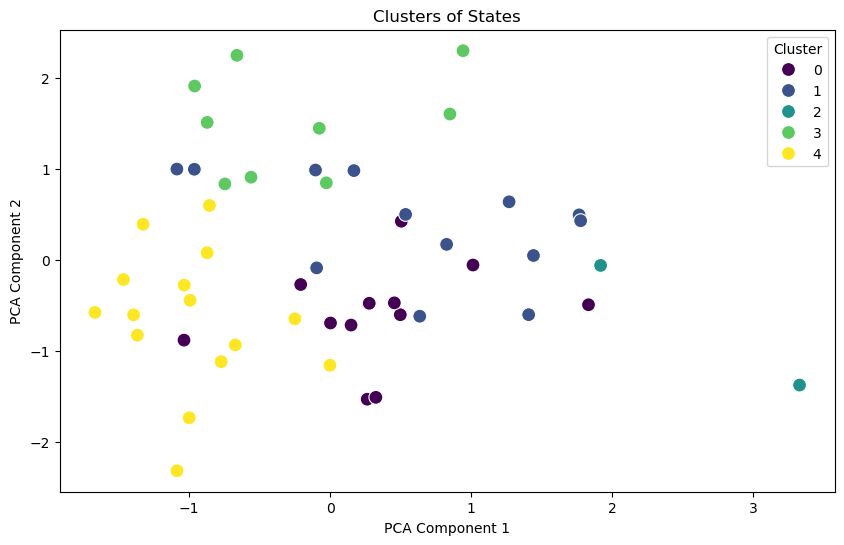

In [8]:
#%%

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_df)
data["pca_1"] = pca_features[:, 0]
data["pca_2"] = pca_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="pca_1", y="pca_2", hue="cluster", data=data, palette="viridis", s=100)
plt.title("Clusters of States")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [9]:
#%%

# Group by clusters and calculate mean values
cluster_analysis = data.groupby("cluster").mean(numeric_only=True)
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
         million_miles_annually  drvr_fatl_col_bmiles  perc_fatl_speed  \
cluster                                                                  
0                  54670.500000             14.391667        40.666667   
1                  74150.076923             14.192308        20.153846   
2                 279112.000000             15.700000        37.500000   
3                  31030.222222             21.500000        27.777778   
4                  32860.600000             14.880000        36.200000   

         perc_fatl_alcohol  perc_fatl_1st_time     pca_1     pca_2  
cluster                                                             
0                33.000000           83.166667  0.338818 -0.606552  
1                29.384615           88.461538  0.582166  0.378263  
2                33.000000           88.000000  2.622168 -0.717950  
3                32.222222           84.666667 -0.235238  1.508979  
4                28.733333           95.933333 -0

### **Cluster 0**
- **Characteristics**:
  - Moderate miles driven annually (`54,670.5` million miles).
  - High percentage of fatal collisions involving speeding (`40.67%`).
  - Moderate percentage of fatal collisions involving alcohol (`33%`).
  - High percentage of first-time offenders (`83.17%`).

- **Policy Recommendations**:
  - **Speed Reduction Measures**:
    - Implement stricter speed limits and enforce them rigorously.
    - Install speed cameras in high-risk areas.
    - Launch public awareness campaigns about the dangers of speeding.
  - **Alcohol-Related Measures**:
    - Increase penalties for drunk driving.
    - Promote designated driver programs and rideshare services.
  - **First-Time Offender Programs**:
    - Introduce educational programs for first-time offenders to reduce recidivism.

---

### **Cluster 1**
- **Characteristics**:
  - Higher miles driven annually (`74,150.08` million miles).
  - Lower percentage of fatal collisions involving speeding (`20.15%`).
  - Moderate percentage of fatal collisions involving alcohol (`29.38%`).
  - Very high percentage of first-time offenders (`88.46%`).

- **Policy Recommendations**:
  - **Drunk Driving Prevention**:
    - Strengthen DUI (Driving Under the Influence) laws and increase enforcement.
    - Conduct sobriety checkpoints, especially during holidays and weekends.
  - **First-Time Offender Programs**:
    - Focus on rehabilitation and education for first-time offenders.
  - **Road Safety Campaigns**:
    - Launch campaigns to promote safe driving habits and awareness of traffic laws.

---

### **Cluster 2**
- **Characteristics**:
  - Very high miles driven annually (`279,112` million miles).
  - Highest percentage of fatal collisions involving speeding (`37.5%`).
  - Moderate percentage of fatal collisions involving alcohol (`33%`).
  - High percentage of first-time offenders (`88%`).

- **Policy Recommendations**:
  - **Infrastructure Improvements**:
    - Invest in better road infrastructure, including wider lanes and improved signage.
    - Upgrade high-risk intersections and highways.
  - **Speed Reduction Measures**:
    - Implement variable speed limits based on traffic conditions.
    - Use automated speed enforcement systems.
  - **Public Awareness**:
    - Launch campaigns targeting long-distance drivers to emphasize the importance of rest and safe driving.

---

### **Cluster 3**
- **Characteristics**:
  - Lower miles driven annually (`31,030.22` million miles).
  - Highest percentage of fatal collisions (`21.5` per 100 million miles).
  - Moderate percentage of fatal collisions involving speeding (`27.78%`).
  - Moderate percentage of fatal collisions involving alcohol (`32.22%`).
  - High percentage of first-time offenders (`84.67%`).

- **Policy Recommendations**:
  - **Comprehensive Road Safety Programs**:
    - Focus on improving road quality and maintenance.
    - Increase police patrols in high-accident areas.
  - **Alcohol and Speed Control**:
    - Implement stricter penalties for both speeding and drunk driving.
    - Promote public awareness campaigns about the dangers of impaired driving.
  - **First-Time Offender Programs**:
    - Introduce mandatory driver education programs for first-time offenders.

---

### **Cluster 4**
- **Characteristics**:
  - Moderate miles driven annually (`32,860.6` million miles).
  - Moderate percentage of fatal collisions involving speeding (`36.2%`).
  - Lower percentage of fatal collisions involving alcohol (`28.73%`).
  - Very high percentage of first-time offenders (`95.93%`).

- **Policy Recommendations**:
  - **Speed Reduction Measures**:
    - Enforce speed limits strictly, especially in urban areas.
    - Use speed bumps and traffic calming measures in residential zones.
  - **First-Time Offender Programs**:
    - Focus on rehabilitation and education for first-time offenders.
  - **Public Awareness**:
    - Launch campaigns to promote safe driving habits and awareness of traffic laws.

---

### **Summary of Policy Recommendations**

| **Cluster** | **Key Issues**                                                                 | **Policy Recommendations**                                                                 |
|-------------|--------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| 0           | High speeding, moderate alcohol, high first-time offenders                     | Stricter speed limits, drunk driving penalties, first-time offender education programs.   |
| 1           | High miles driven, low speeding, moderate alcohol, very high first-time offenders | Strengthen DUI laws, sobriety checkpoints, first-time offender rehabilitation programs.   |
| 2           | Very high miles driven, high speeding, moderate alcohol, high first-time offenders | Infrastructure improvements, variable speed limits, public awareness campaigns.           |
| 3           | High fatal collisions, moderate speeding and alcohol, high first-time offenders | Road quality improvements, stricter penalties, mandatory driver education programs.       |
| 4           | Moderate speeding, low alcohol, very high first-time offenders                 | Speed enforcement, traffic calming measures, first-time offender rehabilitation programs. |


In [10]:
# Suggest policy actions based on cluster characteristics
for cluster in sorted(data["cluster"].unique()):
    print(f"\nPolicy Suggestions for Cluster {cluster}:")
    if cluster == 0:
        print("Focus on reducing speeding and implementing educational programs for first-time offenders.")
        print("Increase penalties for drunk driving and promote designated driver programs.")
    elif cluster == 1:
        print("Strengthen DUI laws and conduct sobriety checkpoints.")
        print("Launch public awareness campaigns targeting safe driving habits.")
    elif cluster == 2:
        print("Invest in infrastructure improvements, such as better road quality and signage.")
        print("Implement variable speed limits and automated speed enforcement systems.")
    elif cluster == 3:
        print("Improve road quality and increase police patrols in high-accident areas.")
        print("Introduce mandatory driver education programs for first-time offenders.")
    elif cluster == 4:
        print("Enforce speed limits strictly and use traffic calming measures in residential zones.")
        print("Focus on rehabilitation and education for first-time offenders.")


Policy Suggestions for Cluster 0:
Focus on reducing speeding and implementing educational programs for first-time offenders.
Increase penalties for drunk driving and promote designated driver programs.

Policy Suggestions for Cluster 1:
Strengthen DUI laws and conduct sobriety checkpoints.
Launch public awareness campaigns targeting safe driving habits.

Policy Suggestions for Cluster 2:
Invest in infrastructure improvements, such as better road quality and signage.
Implement variable speed limits and automated speed enforcement systems.

Policy Suggestions for Cluster 3:
Improve road quality and increase police patrols in high-accident areas.
Introduce mandatory driver education programs for first-time offenders.

Policy Suggestions for Cluster 4:
Enforce speed limits strictly and use traffic calming measures in residential zones.
Focus on rehabilitation and education for first-time offenders.


In [11]:
# Cluster states
for cluster in sorted(data["cluster"].unique()):
    print(f"\nCluster {cluster}:")
    print(data[data["cluster"] == cluster]["state"].values)


Cluster 0:
['Alabama' 'Connecticut' 'Hawaii' 'Maine' 'Missouri' 'New Hampshire'
 'New York' 'North Carolina' 'Pennsylvania' 'Rhode Island' 'Washington'
 'Wisconsin']

Cluster 1:
['Florida' 'Georgia' 'Indiana' 'Iowa' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Nebraska' 'New Jersey' 'New Mexico' 'Ohio'
 'Virginia']

Cluster 2:
['California' 'Texas']

Cluster 3:
['Arkansas' 'Kansas' 'Kentucky' 'Montana' 'North Dakota' 'South Carolina'
 'South Dakota' 'Tennessee' 'West Virginia']

Cluster 4:
['Alaska' 'Arizona' 'Colorado' 'Delaware' 'District of Columbia' 'Idaho'
 'Illinois' 'Louisiana' 'Maryland' 'Nevada' 'Oklahoma' 'Oregon' 'Utah'
 'Vermont' 'Wyoming']
